<a href="https://colab.research.google.com/github/sana-hds/HDS-assignmenet/blob/main/week13/week13_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 13 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Check in your data file along with this exercise. Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [8]:
import pandas as pd

# Loading the data file
df = pd.read_csv('shopping_behavior.csv')

# Displaying the first few rows of the dataset
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
# Displaying the shape of the dataset
print("The Shopping_behavior dataset contains {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The Shopping_behavior dataset contains 3900 rows and 18 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [10]:
# Calculating the number of unique values for each column
unique_counts = df.nunique()
print(unique_counts)

Customer ID               3900
Age                         53
Gender                       2
Item Purchased              25
Category                     4
Purchase Amount (USD)       81
Location                    50
Size                         4
Color                       25
Season                       4
Review Rating               26
Subscription Status          2
Shipping Type                6
Discount Applied             2
Promo Code Used              2
Previous Purchases          50
Payment Method               6
Frequency of Purchases       7
dtype: int64


In [11]:
# Exclude the 'Customer ID' column if it is a unique identifier
unique_values_excluding_id = unique_counts.drop('Customer ID', errors='ignore')

# Find the column with the greatest number of unique values
most_diverse_column = unique_values_excluding_id.idxmax()
most_diverse_value = unique_values_excluding_id.max()

print(f"\nThe column with the greatest number of unique values (excluding Customer ID) is '{most_diverse_column}' with {most_diverse_value} unique values.")


The column with the greatest number of unique values (excluding Customer ID) is 'Purchase Amount (USD)' with 81 unique values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [12]:
# Identifying columns where all values are the same
constant_columns = [col for col in df.columns if df[col].nunique() == 1]

print(f"Columns with the same value in every row: {constant_columns}")

Columns with the same value in every row: []


Observation:

--------

**There is no column in this shopping_behavior dataset where the value for every row is same which means there is no redundant data in this dataset.**

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

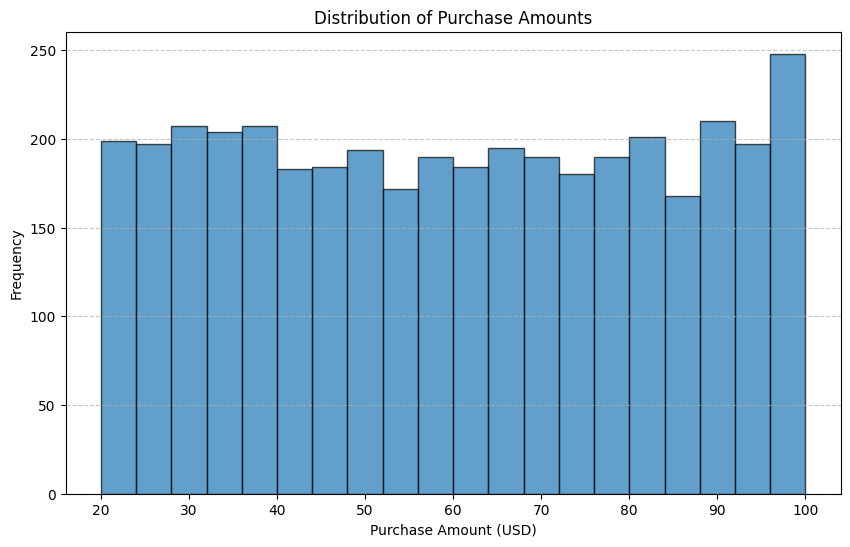

In [13]:
import matplotlib.pyplot as plt

# Plotting the histogram for the "Purchase Amount (USD)" column
plt.figure(figsize=(10, 6))
plt.hist(df['Purchase Amount (USD)'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

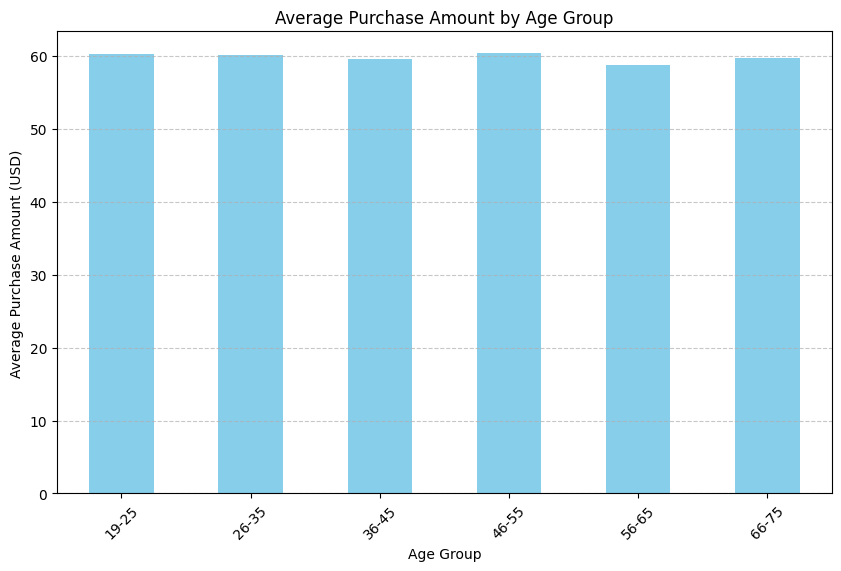

In [14]:
# Create age groups
bins = [0, 18, 25, 35, 45, 55, 65, 75, 85, 95, 105]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95', '96-105']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate the average purchase amount for each age group, setting observed=True
avg_purchase_by_age_group = df.groupby('Age Group', observed=True)['Purchase Amount (USD)'].mean()

# Plot the average purchase amount by age group
plt.figure(figsize=(10, 6))
avg_purchase_by_age_group.plot(kind='bar', color='skyblue')
plt.title('Average Purchase Amount by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

<b>Key Insights from the Graph<br>

Consistent Purchase Amounts Across Age Groups:</b>

--> The average purchase amounts for all the age groups are quite similar, hovering around $60.

--> This suggests that age does not significantly influence the purchase amount among the customers in this dataset.

<b>No Outliers in Purchase Behavior:</b>

--> There are no significant spikes or drops in the average purchase amounts across different age groups.

--> This indicates a uniform purchasing behavior across various age demographics.

<b>Data Coverage for Age Groups:</b>

--> The graph covers a wide range of age groups, from 19 to 75 years, ensuring a comprehensive analysis across different age demographics.

However, some age ranges like 0-18 and 76-105 might have limited or no data, as they are not depicted in the chart.



---



## Submitting Your Work

Submit your work as usual.